In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime, date, time

import sklearn.linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
import sklearn.feature_extraction
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
%matplotlib inline

import matplotlib.pyplot as plt
from pprint import pformat
plt.style.use('ggplot')


#import category_encoders as ce

In [0]:
# Выполнить код в ячейке в случае ошибок импорта (+ дополнить модулями, если их не хватает)
#! pip install category_encoders #Библиотека для работы с категориальными признаками
! pip install catboost

In [0]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [0]:
df = pd.read_csv('train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test = pd.read_csv('test.csv', index_col='Id')
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Preprocessing (I part)

## Train Dataset

In [0]:
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
short_column_description = ['Identifies the type of dwelling involved in the sale','Identifies the general zoning classification of the sale','Linear feet of street connected to property','Lot size in square feet','Type of road access to property','Type of alley access to property','General shape of property','Flatness of the property','Type of utilities available','Lot configuration','Slope of property','Physical locations within Ames city limits','Proximity to various conditions','Proximity to various conditions (if more than one is present)','Type of dwelling','Style of dwelling','Rates the overall material and finish of the house','Rates the overall condition of the house','Original construction date','Remodel date (same as construction date if no remodeling or additions)','Type of roof','Roof material','Exterior covering on house','Exterior covering on house (if more than one material)','Masonry veneer type','Masonry veneer area in square feet','Evaluates the quality of the material on the exterior ','Evaluates the present condition of the material on the exterior','Type of foundation','Evaluates the height of the basement','Evaluates the general condition of the basement','Refers to walkout or garden level walls','Rating of basement finished area','Type 1 finished square feet','Rating of basement finished area (if multiple types)','Type 2 finished square feet','Unfinished square feet of basement area','Total square feet of basement area','Type of heating','Heating quality and condition','Central air conditioning','Electrical system','First Floor square feet','Second floor square feet','Low quality finished square feet (all floors)','Above grade (ground) living area square feet','Basement full bathrooms','Basement half bathrooms','Full bathrooms above grade','Half baths above grade','Bedrooms above grade (does NOT include basement bedrooms)','Kitchens above grade','Kitchen quality','Total rooms above grade (does not include bathrooms)','Home functionality (Assume typical unless deductions are warranted)','Number of fireplaces','Fireplace quality','Garage location','Year garage was built','Interior finish of the garage','Size of garage in car capacity','Size of garage in square feet','Garage quality','Garage condition','Paved driveway','Wood deck area in square feet','Open porch area in square feet','Enclosed porch area in square feet','Three season porch area in square feet','Screen porch area in square feet','Pool area in square feet','Pool quality','Fence quality','Miscellaneous feature not covered in other categories','$Value of miscellaneous feature','Month Sold (MM)','Year Sold (YYYY)','Type of sale','Condition of sale','']
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype),
              'column_description': short_column_description})

,Feature,NaN_count,number_of_unique_elements,type,column_description
0,MSSubClass,0,15,int64,Identifies the type of dwelling involved in th...
1,MSZoning,0,5,object,Identifies the general zoning classification o...
2,LotFrontage,259,110,float64,Linear feet of street connected to property
3,LotArea,0,1073,int64,Lot size in square feet
4,Street,0,2,object,Type of road access to property
5,Alley,1369,2,object,Type of alley access to property
6,LotShape,0,4,object,General shape of property
7,LandContour,0,4,object,Flatness of the property
8,Utilities,0,2,object,Type of utilities available
9,LotConfig,0,5,object,Lot configuration


## Test Dataset

In [0]:
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
short_column_description = ['Identifies the type of dwelling involved in the sale','Identifies the general zoning classification of the sale','Linear feet of street connected to property','Lot size in square feet','Type of road access to property','Type of alley access to property','General shape of property','Flatness of the property','Type of utilities available','Lot configuration','Slope of property','Physical locations within Ames city limits','Proximity to various conditions','Proximity to various conditions (if more than one is present)','Type of dwelling','Style of dwelling','Rates the overall material and finish of the house','Rates the overall condition of the house','Original construction date','Remodel date (same as construction date if no remodeling or additions)','Type of roof','Roof material','Exterior covering on house','Exterior covering on house (if more than one material)','Masonry veneer type','Masonry veneer area in square feet','Evaluates the quality of the material on the exterior ','Evaluates the present condition of the material on the exterior','Type of foundation','Evaluates the height of the basement','Evaluates the general condition of the basement','Refers to walkout or garden level walls','Rating of basement finished area','Type 1 finished square feet','Rating of basement finished area (if multiple types)','Type 2 finished square feet','Unfinished square feet of basement area','Total square feet of basement area','Type of heating','Heating quality and condition','Central air conditioning','Electrical system','First Floor square feet','Second floor square feet','Low quality finished square feet (all floors)','Above grade (ground) living area square feet','Basement full bathrooms','Basement half bathrooms','Full bathrooms above grade','Half baths above grade','Bedrooms above grade (does NOT include basement bedrooms)','Kitchens above grade','Kitchen quality','Total rooms above grade (does not include bathrooms)','Home functionality (Assume typical unless deductions are warranted)','Number of fireplaces','Fireplace quality','Garage location','Year garage was built','Interior finish of the garage','Size of garage in car capacity','Size of garage in square feet','Garage quality','Garage condition','Paved driveway','Wood deck area in square feet','Open porch area in square feet','Enclosed porch area in square feet','Three season porch area in square feet','Screen porch area in square feet','Pool area in square feet','Pool quality','Fence quality','Miscellaneous feature not covered in other categories','$Value of miscellaneous feature','Month Sold (MM)','Year Sold (YYYY)','Type of sale','Condition of sale']
pd.DataFrame({'Feature': test.columns.tolist(),
              'NaN_count': test.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(test.columns.tolist()).apply(lambda row: test[row].nunique()),
              'type': pd.Series(test.columns.tolist()).apply(lambda row: test[row].dtype),
              'column_description': short_column_description})

,Feature,NaN_count,number_of_unique_elements,type,column_description
0,MSSubClass,0,16,int64,Identifies the type of dwelling involved in th...
1,MSZoning,4,5,object,Identifies the general zoning classification o...
2,LotFrontage,227,115,float64,Linear feet of street connected to property
3,LotArea,0,1106,int64,Lot size in square feet
4,Street,0,2,object,Type of road access to property
5,Alley,1352,2,object,Type of alley access to property
6,LotShape,0,4,object,General shape of property
7,LandContour,0,4,object,Flatness of the property
8,Utilities,2,1,object,Type of utilities available
9,LotConfig,0,5,object,Lot configuration


In [0]:
def data_preprocessing(dataframe):
  data = dataframe
  data['MSZoning'].fillna('RL', inplace = True)
  data['LotFrontage'].fillna(float(data['LotFrontage'].mode()), inplace = True)
  data['Alley'].fillna('NA', inplace = True)
  data['Utilities'].fillna('AllPub', inplace = True)
  data['MasVnrType'].fillna('None', inplace = True)
  data['MasVnrArea'].fillna(0, inplace = True)
  data['Exterior1st'].fillna('Other', inplace = True)
  data['Exterior2nd'].fillna('Other', inplace = True)
  data['BsmtQual'].fillna('NA', inplace = True)
  data['BsmtCond'].fillna('NA', inplace = True)
  data['BsmtExposure'].fillna('NA', inplace = True)
  data['BsmtFinType1'].fillna('NA', inplace = True)
  data['BsmtFinSF1'].fillna(float(data['BsmtFinSF1'].mode()), inplace = True)
  data['BsmtFinType2'].fillna('NA', inplace = True)
  data['BsmtFinSF2'].fillna(float(data['BsmtFinSF2'].mode()), inplace = True)
  data['BsmtUnfSF'].fillna(float(data['BsmtUnfSF'].mode()), inplace = True)
  data.loc[data['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = data.loc[data['TotalBsmtSF'].isnull()]['BsmtFinSF1'] + data.loc[data['TotalBsmtSF'].isnull()]['BsmtFinSF2'] + data.loc[data['TotalBsmtSF'].isnull()]['BsmtUnfSF']
  data['Electrical'].fillna('SBrkr', inplace = True)
  data['BsmtFullBath'].fillna(0.0, inplace = True)
  data['BsmtHalfBath'].fillna(0.0, inplace = True)
  data['KitchenQual'].fillna('TA',inplace = True)
  data['Functional'].fillna('Typ',inplace = True)
  data['FireplaceQu'].fillna('NA', inplace = True)
  data['GarageType'].fillna('NA', inplace = True)
  data['GarageYrBlt'].fillna(0.0, inplace = True)
  data['GarageFinish'].fillna('NA', inplace = True)
  data['GarageQual'].fillna('NA', inplace = True)
  data['GarageCond'].fillna('NA', inplace = True)
  data['GarageCars'].fillna(0.0, inplace = True)
  data['GarageArea'].fillna(0.0, inplace = True)
  data['PoolQC'].fillna('NA', inplace = True)
  data['Fence'].fillna('NA', inplace = True)
  data['MiscFeature'].fillna('NA', inplace = True)
  data['SaleType'].fillna('WD', inplace = True)

  data['MSSubClass'] = data['MSSubClass'].astype('str')
  data['OverallQual'] = data['OverallQual'].astype('str')
  data['OverallCond'] = data['OverallCond'].astype('str')

  return data

In [0]:
# Обработка данных. Заполнение пропусков.
test = data_preprocessing(test)
df = data_preprocessing(df)

# Exploratory Data Analysis

In [0]:
# Визуализация и прочее тут

In [0]:
# Графический анализ исходного датасэта
df_v = pd.read_csv('train.csv', index_col='Id')


In [0]:
# Изучим показатель SalePrice
df_v['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

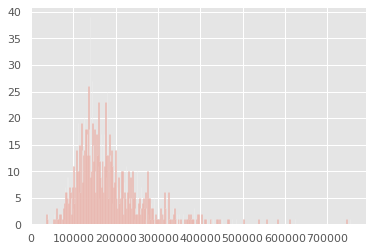

In [0]:
df_v['SalePrice'].hist(bins=500); # обнаружил выброс при bins = 500 (Наиболее частовстречающееся значение) 

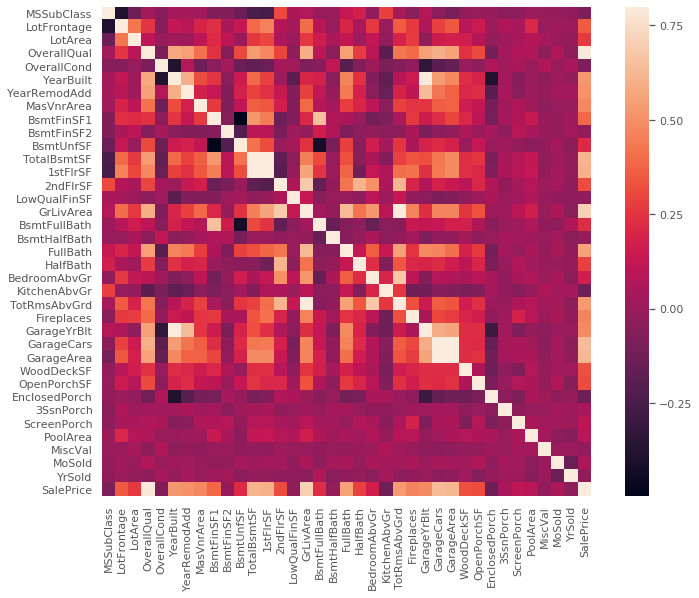

In [0]:

# Корреляция
corrmat = df_v.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# 

Корреллируют: (в скобках корреляция друг с другом) garageYearBuilt - (0.825667) - YearBuilt , 1stflrsf - (0.819530) - totalBSMTsf , totRmsAbvGrd - (0.825489) - GrLivArea,garageCars - (0.882475) - GarageArea



Корреллируют: (в скобках корреляция с ценой)
garageYearBuilt (0.486)- YearBuilt (0.52),
1stflrsf (0.605)- totalBSMTsf (0.614),
totRmsAbvGrd (0.534) - GrLivArea (0.71),
garageCars (0.64) - GarageArea (0.62)


In [0]:
df_v.corr()[abs(df_v.corr() >=0.5)] #  Отбрасываем признаки 1stflrsf, totRmsAbvGrd, GarageArea

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_v.corr().loc['SalePrice'].loc[df_v.corr().loc['SalePrice']>0.6]

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

Самые влиятельные: OverallQual(категориальн), TotalBsmtSF, GrLivArea, GarageCars (категориальн)

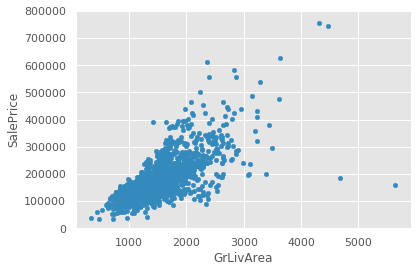

In [0]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Почти прямая зависимость -> линейная регрессия!

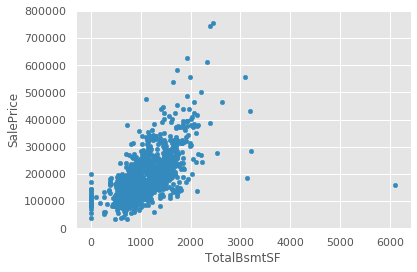

In [0]:
#scatter plot TotalBsmtSF/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Почти прямая зависимость -> линейная регрессия!



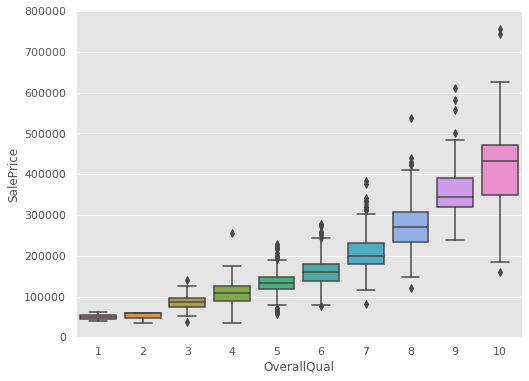

In [0]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

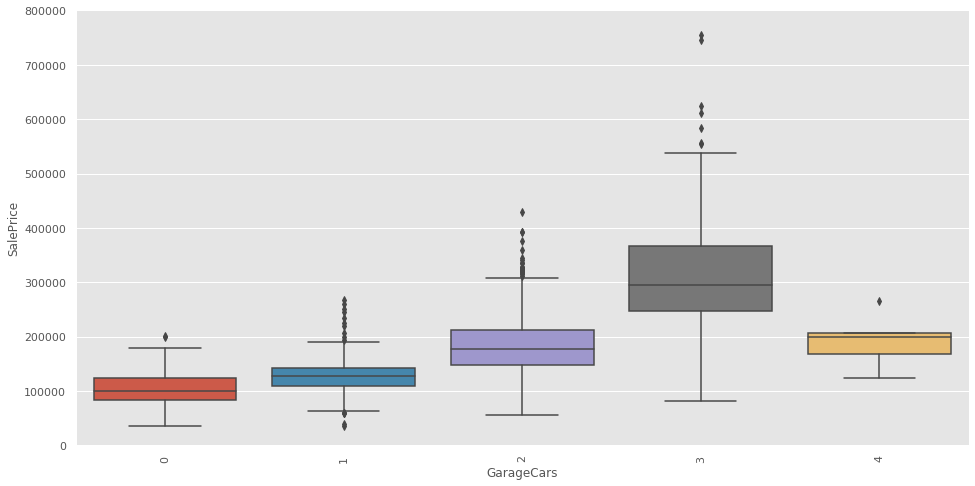

In [0]:
#box plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([df_v['SalePrice'], df_v[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

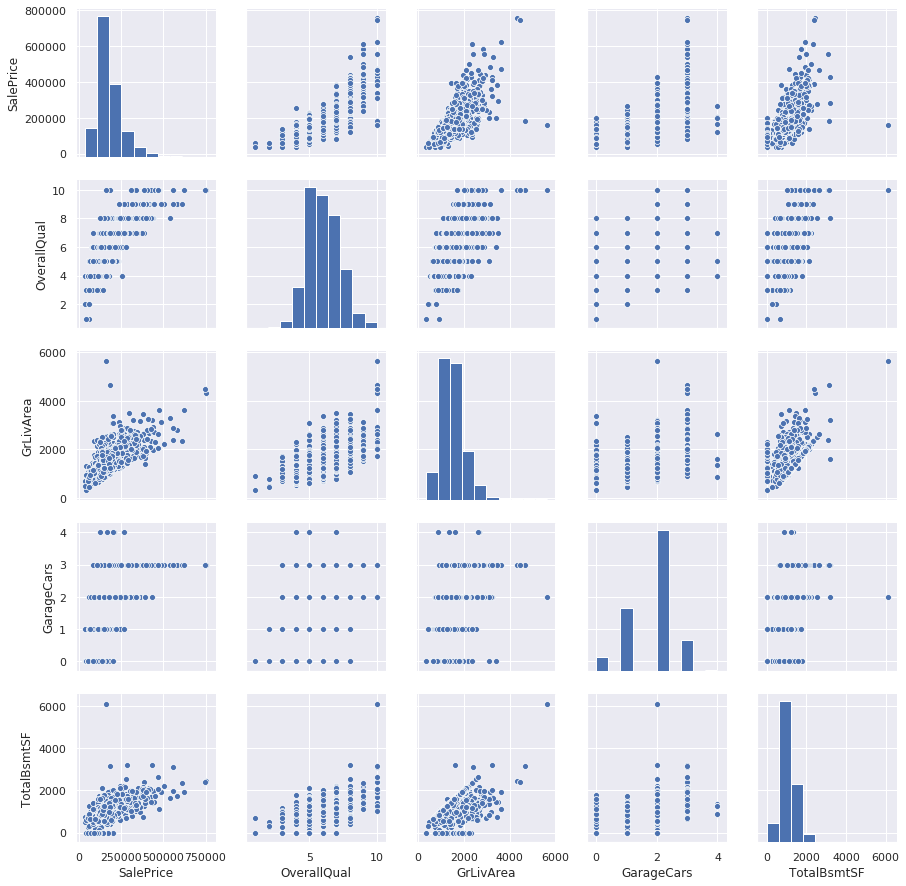

In [0]:
# посмотрим, что происхоидит с выбранными признаками
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df_v[cols], size = 2.5)
plt.show();

Интересная зависимость между TotalBsmtSF и GrLivArea, но объяснима. Подвал и жилая площадь в жизни сопоставимы. Подвал обычно строится меньше, чем жил площадь

# Feature Engineering

In [0]:
def generate_new_features(data):

  #Выделение каждого типа utilities в отдельный признак
  data['Electricity'] = 1
  data['Gas'] = data['Utilities'].apply(lambda x: 0 if x == 'ELO' else 1)
  data['Water'] = data['Utilities'].apply(lambda x: 0 if x in ['ELO','NoSeWa'] else 1)
  data['Sewer'] = data['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)

  #----------------------------------------------------------------------------#

  # Если condition1 = condition2 = norm, то дома являеются обычным
  def NormalCondition_generate(row):
    if row['Condition1'] == 'Norm' and row['Condition2'] == 'Norm':
      return 1
    else:
      return 0

  data['NormalCondition'] = data.apply(lambda row: NormalCondition_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # Была ли реконструкция дома
  def Remodeling_generate(row):
    if row['YearBuilt'] != row['YearRemodAdd']:
      return 1
    else:
      return 0

  data['Remodeling'] = data.apply(lambda row: Remodeling_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # Качество дома и отделки одновременно выше среднего
  def AboveAverageOverallQuality_generate(row):
    if (row['OverallQual'] in [6,7,8,9,10]) and (row['OverallCond'] in [6,7,8,9,10]):
      return 1
    else:
      return 0

  data['AboveAverageOverallQuality'] = data.apply(lambda row: AboveAverageOverallQuality_generate(row), axis = 1)

  #----------------------------------------------------------------------------#

  # Два разных материала для экстерьера
  def MultipleExterior_generate(row):
    if row['Exterior1st'] != row['Exterior2nd']:
      return 1
    else:
      return 0

  data['MultipleExterior'] =  data.apply(lambda row: MultipleExterior_generate(row), axis = 1)

  #----------------------------------------------------------------------------#
  
  # Доли площадей
  data['MasVnrAreaFraction'] = data['MasVnrArea'] / data['LotArea']
  data['GrLivAreaFraction'] = data['GrLivArea'] / data['LotArea']
  data['GarageAreaFraction'] = data['GarageArea'] / data['LotArea']
  data['PoolAreaFraction'] = data['PoolArea'] / data['LotArea']
  data['BsmtFinSF1Fraction'] = data['BsmtFinSF1'] / data['LotArea']
  data['BsmtFinSF2Fraction'] = data['BsmtFinSF2'] / data['LotArea']
  data['BsmtUnfSFFraction'] = data['BsmtUnfSF']   / data['LotArea']
  data['TotalBsmtSFFraction'] = data['TotalBsmtSF'] / data['LotArea']
  data['1stFlrSFFraction'] = data['1stFlrSF'] / data['LotArea']
  data['2ndFlrSFFraction'] = data['2ndFlrSF'] / data['LotArea']
  data['LowQualFinSFFraction'] = data['LowQualFinSF'] / data['LotArea']
  data['WoodDeckSFFraction'] = data['WoodDeckSF'] / data['LotArea']
  data['OpenPorchSFFraction'] = data['OpenPorchSF'] / data['LotArea']
  data['EnclosedPorchFraction'] = data['EnclosedPorch'] / data['LotArea']
  data['3SsnPorchFraction'] = data['3SsnPorch'] / data['LotArea']
  data['ScreenPorchFraction'] = data['ScreenPorch']  / data['LotArea']

  #----------------------------------------------------------------------------#

  def SeasonSold_generate(month):
    if month in (12,1,2):
      return 'Winter'
    elif month in (3,4,5):
      return 'Spring'
    elif month in (6,7,8):
      return 'Summer'
    else:
      return 'Fall'

  data['SeasonSold'] = data['MoSold'].apply(SeasonSold_generate)


  return data

In [0]:
df_original = df.copy()
test_original = test.copy()

df = generate_new_features(df)
test = generate_new_features(test)

**Анализ датасэта с дополнительными признаками**


In [0]:
df.describe()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1.0,1.0,0.999315,0.999315,0.863014,0.476712,0.0,0.147260,0.012575,0.180590,0.055468,0.000174,0.050728,0.005224,0.068616,0.124569,0.136176,0.043722,0.000692,0.010678,0.005269,0.002566,0.000311,0.001508
std,22.356355,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.0,0.0,0.026171,0.026171,0.343951,0.499629,0.0,0.354487,0.029660,0.111914,0.037056,0.002812,0.057514,0.021703,0.066975,0.073804,0.071683,0.068180,0.005880,0.016829,0.008545,0.007316,0.002698,0.005789
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.119041,0.034155,0.000000,0.000000,0.000000,0.023582,0.083389,0.094103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.0,1.0,1.00

In [0]:
print ('Rows in the data frame: {0}'.format(len(df)))
print ('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 1460
Rows without NAN: 1460


In [0]:
df.corr()[abs(df.corr() >=0.5)]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Electricity,Gas,Water,Sewer,NormalCondition,Remodeling,AboveAverageOverallQuality,MultipleExterior,MasVnrAreaFraction,GrLivAreaFraction,GarageAreaFraction,PoolAreaFraction,BsmtFinSF1Fraction,BsmtFinSF2Fraction,BsmtUnfSFFraction,TotalBsmtSFFraction,1stFlrSFFraction,2ndFlrSFFraction,LowQualFinSFFraction,WoodDeckSFFraction,OpenPorchSFFraction,EnclosedPorchFraction,3SsnPorchFraction,ScreenPorchFraction
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.702388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,0.522396,NaN,NaN,1.000000,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819530,1.000000,NaN,NaN,0.566024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Новые признаки слабо влияют на цену, поэтому не будем брать их в расчет

# Preproccesing (II part)

In [0]:
# Записываем категориальные фичи
cat_features = df.columns[df.dtypes == 'object'].tolist()
cat_features_original = df_original.columns[df_original.dtypes == 'object'].tolist()

In [0]:
# Записываем непрерывные фичи
numerical_feature = []

for col_name in df.columns:
    if col_name not in cat_features+['SalePrice']:
        numerical_feature = numerical_feature + [col_name]


numerical_feature_original = []

for col_name in df_original.columns:
    if col_name not in cat_features+['SalePrice']:
        numenumerical_feature_originalrical_feature = numerical_feature_original + [col_name]

In [0]:
print('train shape: ', df.shape)
print('test shape: ', test.shape)

# Отметка для последующего разделения датасетов
b = df.shape[0]

print('train shape original: ', df_original.shape)
print('test shape original: ', test_original.shape)

# Отметка для последующего разделения датасетов
c = df_original.shape[0]

train shape:  (1460, 105)
test shape:  (1459, 104)
train shape original:  (1460, 80)
test shape original:  (1459, 79)


In [0]:
# Объединяем test и train датасет для обработки категориальных переменных
df_concat = pd.concat([df,test])
print('df_concat shape: ',df_concat.shape)

df_concat_original = pd.concat([df_original,test_original])
print('df_concat shape: ',df_concat_original.shape)



df_concat shape:  (2919, 105)
df_concat shape:  (2919, 80)


In [0]:
# Обработка категориальных признаков с помощью One Hot Encoding
df_concat_cat_features = pd.get_dummies(df_concat[cat_features])

# Удаление категориальных переменных
df_concat.drop(cat_features, axis = 1, inplace = True)

# Присоединение новых
df_concat = pd.concat([df_concat_cat_features, df_concat], axis = 1 )



# Обработка категориальных признаков с помощью One Hot Encoding
df_concat_cat_features_original = pd.get_dummies(df_concat_original[cat_features_original])

# Удаление категориальных переменных
df_concat_original.drop(cat_features_original, axis = 1, inplace = True)

# Присоединение новых
df_concat_original = pd.concat([df_concat_cat_features, df_concat_original], axis = 1 )

In [0]:
# Обратное разделение на train и test
df = df_concat[:b]
test = df_concat[b:]
test.drop(['SalePrice'], axis=1, inplace=True)


# Обратное разделение на train и test
df_original = df_concat_original[:c]
test_original = df_concat_original[c:]
test_original.drop(['SalePrice'], axis=1, inplace=True)

In [0]:
print('train shape: ', df.shape)
print('test shape: ', test.shape)

print('train shape original: ', df_original.shape)
print('test shape original: ', test_original.shape)

train shape:  (1460, 364)
test shape:  (1459, 363)
train shape original:  (1460, 340)
test shape original:  (1459, 339)


In [0]:
# Тут можно не разбираться, класс написан для удобного кодирования категориальных фичей

# class MyEncoder:
#     def __init__(self, name):
#         self.name=name
#         self_columns=None
#         self.dict={}
        
#     def fit(self,X,list_to_encode):
#         self.columns=list_to_encode
#         for column in list_to_encode:
#             self.dict[column]=LabelEncoder().fit(X[column].astype(str))
            
#     def transform(self,X):
#         for column in self.columns:
#             X[column]=self.dict[column].transform(X[column].astype(str))
            
#     def fit_transform(self, X, list_to_encode):
#         self.fit(X,list_to_encode)
#         self.transform(X)

In [0]:
# С помощью класса кодируем категориальные фичи

# enc=MyEncoder('encoder')
# enc.fit(df_concat,cat_features)
# enc.transform(df_concat)

In [0]:
# df_concat = pd.concat([df,test])
# print('df_concat shape: ',df_concat.shape)

In [0]:
# df = df_concat[:b]
# test = df_concat[b:]
# test.drop(['SalePrice'], axis=1, inplace=True)

In [0]:
# Категориальные фичи нужно разложить в дамми переменные

# df_cat_features = pd.DataFrame({})
# test_cat_features = pd.DataFrame({})

# for cat_feature in cat_features:
#     df_cat_feature = pd.get_dummies(df[cat_feature], prefix=cat_feature+ '_')
#     df_cat_features = pd.concat([df_cat_features, df_cat_feature], axis=1)
#     test_cat_feature = pd.get_dummies(test[cat_feature], prefix=cat_feature+ '_')
#     test_cat_features = pd.concat([test_cat_features, test_cat_feature], axis=1)

In [0]:
# df = pd.concat([df_cat_features, df[numerical_feature]], axis  = 1 )
# test = pd.concat([test_cat_features, test[numerical_feature]], axis  = 1 )

In [0]:
# print('train shape: ', df.shape)
# print('test shape: ', test.shape)

In [0]:
# Для сравнения кач-ва можно в линейных моделях попробовать как стандратизированные данные, так и нет

scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_feature]), columns = numerical_feature)
test_scaled = pd.DataFrame(scaler.fit_transform(test[numerical_feature]), columns = numerical_feature)

In [0]:
# для лин моделей и svm
df_linear = df
test_linear = test

# для лин моделей со стандартизированными данными
df_linear_scaler = df_scaled
test_linear_scaler = test_scaled

# для xgboost
df_xgboost = df_linear.copy()
test_xgboost = test_linear.copy()

# для случайного леса
df_rf = df_linear.copy()
test_rf = test_linear.copy()

# для градиентного бустинга от Майкрософта и Яндекса
df_lgbm = pd.read_csv('train.csv', index_col='Id')
df_cat = df_lgbm.copy()
test_lgbm = pd.read_csv('test.csv', index_col='Id')
test_cat = test_lgbm.copy()

In [0]:
# Закомментировано, т.к вызывало ошибку. 
# Для обработки пропущенных значений можно использовать метод из Preprocessing (I part)

# обработка для градиентного бустинга от Майкрософта

# df_lgbm.loc[df_lgbm['LotFrontage'].astype(str) == 'nan', 'LotFrontage'] = 600.0
# df_lgbm.loc[df_lgbm['Alley'].astype(str) == 'nan', 'Alley'] = 'NA'
# df_lgbm.loc[df_lgbm['MasVnrType'].astype(str) == 'nan', 'MasVnrType'] = 'None'
# df_lgbm.loc[df_lgbm['MasVnrArea'].astype(str) == 'nan', 'MasVnrArea'] = 0.0
# df_lgbm.loc[df_lgbm['BsmtQual'].astype(str) == 'nan', 'BsmtQual'] = 'NA'
# df_lgbm.loc[df_lgbm['BsmtCond'].astype(str) == 'nan', 'BsmtCond'] = 'NA'
# df_lgbm.loc[df_lgbm['BsmtExposure'].astype(str) == 'nan', 'BsmtExposure'] = 'NA'
# df_lgbm.loc[df_lgbm['BsmtFinType1'].astype(str) == 'nan', 'BsmtFinType1'] = 'NA'
# df_lgbm.loc[df_lgbm['BsmtFinType2'].astype(str) == 'nan', 'BsmtFinType2'] = 'NA'
# df_lgbm.loc[df_lgbm['Electrical'].astype(str) == 'nan', 'Electrical'] = 'SBrkr'
# df_lgbm.loc[df_lgbm['FireplaceQu'].astype(str) == 'nan', 'FireplaceQu'] = 'NA'
# df_lgbm.loc[df_lgbm['GarageType'].astype(str) == 'nan', 'GarageType'] = 'NA'
# df_lgbm.loc[df_lgbm['GarageYrBlt'].astype(str) == 'nan', 'GarageYrBlt'] = 0.0
# df_lgbm.loc[df_lgbm['GarageFinish'].astype(str) == 'nan', 'GarageFinish'] = 'NA'
# df_lgbm.loc[df_lgbm['GarageQual'].astype(str) == 'nan', 'GarageQual'] = 'NA'
# df_lgbm.loc[df_lgbm['GarageCond'].astype(str) == 'nan', 'GarageCond'] = 'NA'
# df_lgbm.loc[df_lgbm['PoolQC'].astype(str) == 'nan', 'PoolQC'] = 'NA'
# df_lgbm.loc[df_lgbm['Fence'].astype(str) == 'nan', 'Fence'] = 'NA'
# df_lgbm.loc[df_lgbm['MiscFeature'].astype(str) == 'nan', 'MiscFeature'] = 'NA'
# enc.transform(df_lgbm)

# Model Training

In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

# Список словарей для хранения информации по каждой модели
models_info = []

def train_validate_model(model, X,y , grid_search_params):
       
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 42)
    
    model_grid = GridSearchCV(model, 
                              grid_search_params,
                              #scoring = make_scorer(mean_squared_log_error), # Установка метрики по которой будут сравниваться модели
                              cv=5, n_jobs=-1,verbose= 0)
    
    model_grid.fit(X_train, y_train)

    # Переменные для вывода и для сохранения
    model_type = str(type(model)).split('.')[-1].replace("'>",'') # Выделение названия модели из type(model)
    MAE = mean_absolute_error(y_test,model_grid.predict(X_test))
    #MSLE = mean_squared_log_error(y_test, model_grid.predict(X_test))
    MSE = mean_squared_error(y_test, model_grid.predict(X_test))

    models_info.append({
        'model': model_type,
        'RMSE' : np.sqrt(MSE),
        'MAE': MAE,
        'Best score (R^2)': model_grid.best_score_,
        'Best params': model_grid.best_params_
        })

    print('Тип модели: ', model_type)
    print('RMSE: {}'.format(np.sqrt(MSE)))
    print('MAE: {}'.format(MAE))
    print('Best score (R^2): ', model_grid.best_score_)
    print('Best params: ',model_grid.best_params_)
    print('-----------------------------------\n')
    return model_grid.best_estimator_
    #return (model_grid.best_estimator_, model_grid.cv_results_)

## Linear Regression

In [0]:
# Разделение датасета features и target
X_lm, y_lm = df_linear.drop('SalePrice',axis = 1), df_linear['SalePrice']
X_lm_original, y_lm_original = df_original.drop('SalePrice',axis = 1), df_original['SalePrice']

In [0]:
# Объявление моделей
from sklearn.linear_model import LinearRegression, Ridge, Lasso, MultiTaskLasso, ElasticNet, HuberRegressor

linreg = LinearRegression()
linreg_params = {'normalize' : [True, False]}

ridgereg = Ridge()
ridgereg_params = {'alpha': np.arange(1,4,0.1),
                   'normalize' : [True, False]}

lassorreg = Lasso()
lassorreg_params = {'alpha': np.arange(1,4,0.1),
                    'normalize' : [True, False]}


linear_models = [(linreg, linreg_params),
                 (ridgereg,ridgereg_params),
                 (lassorreg, lassorreg_params)]

In [0]:
# Обучение моделей
print('Generated features')
for model in linear_models:
    estimator = train_validate_model(model[0], X_lm, y_lm, model[1])

print('Original features')
for model in linear_models:
    estimator = train_validate_model(model[0], X_lm_original, y_lm_original, model[1])

Generated features
Тип модели:  LinearRegression
RMSE: 62146.772117484805
MAE: 20601.30749472657
Best score (R^2):  0.5940180871453549
Best params:  {'normalize': False}
-----------------------------------

Тип модели:  Ridge
RMSE: 32066.42087326959
MAE: 18333.90157770275
Best score (R^2):  0.8208264665803189
Best params:  {'alpha': 1.0, 'normalize': True}
-----------------------------------

Тип модели:  Lasso
RMSE: 31425.54022295649
MAE: 17603.766648480545
Best score (R^2):  0.8209601862611468
Best params:  {'alpha': 1.1, 'normalize': True}
-----------------------------------

Original features
Тип модели:  LinearRegression
RMSE: 61449.07435130699
MAE: 19959.686522667926
Best score (R^2):  0.6080209751679744
Best params:  {'normalize': False}
-----------------------------------

Тип модели:  Ridge
RMSE: 32327.947709195207
MAE: 18457.483662772942
Best score (R^2):  0.8168879451031816
Best params:  {'alpha': 1.0, 'normalize': True}
-----------------------------------

Тип модели:  Lass

In [0]:
# Получение результата предсказаний
test_linear['SalePrice'] = linear_estimators[1].predict(test_linear)
test_linear.reset_index(inplace= True)
test_linear[['Id','SalePrice']].to_csv('test_linear_prediction.csv', index = False)
test_linear.set_index('Id', inplace = True)
test_linear.drop('SalePrice', axis = 1, inplace = True)

## Random Forest

In [0]:
# Разделение датасета features и target
X_rf = df_rf.drop('SalePrice',axis = 1)
y_rf = df_rf['SalePrice']

In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_holdout, y_train, y_holdout = train_test_split(X_rf.values, y_rf, test_size=0.3, random_state=17)

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [0]:
RFR_params = {'max_depth': range(1,11),
              'max_features': range(1,363)} # по кол-ву признаков
RFR_grid = GridSearchCV(RFR, RFR_params,
                         cv=4, n_jobs=-1,
                         verbose=True)
RFR_grid.fit(X_train, y_train)

Fitting 4 folds for each of 3620 candidates, totalling 14480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 29.0min


In [0]:
result=pd.DataFrame({"Best parameters": RFR_grid.best_params_,
                         "Best score (R^2)": RFR_grid.best_score_,
                         "RMSE": np.sqrt(mean_squared_error(y_holdout,RFR_grid.predict(X_holdout))),
                         "MAE": mean_absolute_error(y_holdout,RFR_grid.predict(X_holdout)),
                         "Method": "RFR"}) 
result

In [0]:
# Получение результата предсказаний
df_predict = pd.DataFrame({'Id': test.index, 'SalePrice_predict': RFR_grid.predict(test)}) 

In [0]:
df_predict.head()

In [0]:
df_predict.to_csv('test_rf_prediction.csv', index = False)

## XGBoost

In [0]:
# Для тренировки модели используем сформированный датасет df_xgboost. Делим выборку на зависимую 
# переменную (y) и объясняемые переменные (Х).
 
X_xgboost = df_xgboost.drop('SalePrice',axis = 1)
y_xgboost = df_xgboost['SalePrice']


In [0]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_xgboost,y_xgboost,train_size = 0.8)

In [0]:
import xgboost as xgb

In [0]:
#Поскольку мы решаем задачу определения цены (то есть задачу регрессии), будем использовать
#модуль XGBRegressor
#Найдем наилучшие параметры модели с помощью GridSearch

In [0]:
gbm = xgb.XGBRegressor(objective = 'reg:squarederror')
reg_cv = GridSearchCV(gbm, 
    { "eta"    : [0.05, 0.10, 0.20, 0.30 ] ,
    "max_depth"        : [ 4, 5, 6],
    "min_child_weight" : [ 7, 8, 9 ],
    "gamma"            : [ 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.5 , 0.7 , 1.0 ], 
     "n_estimators" : [50, 100]},
     n_jobs=-1, verbose=True)

reg_cv.fit(X_train_xg,y_train_xg);

In [0]:
#Выведем лучшие параметры модели

reg_cv.best_params_

In [0]:
#Выведем коэффициент детерминации для обучающей выборки
reg_cv.score(X_train_xg,y_train_xg)

In [0]:
#Выведем коэффициент детерминации для тестовой выборки
reg_cv.score(X_test_xg,y_test_xg)

In [0]:
#Обучим модель с наилучшими параметрами с использованием XGBRegressor

gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train_xg, y_train_xg)

In [0]:
result=pd.DataFrame({"Best parameters": reg_cv.best_params_,
                         "Best score (R^2)": reg_cv.best_score_,
                         "RMSE": np.sqrt(mean_squared_error(y_test_xg, reg_cv.predict(X_test_xg))),
                         "MAE": mean_absolute_error(y_test_xg, reg_cv.predict(X_test_xg)),
                         "Method": "XGBoost"}) 
result

In [0]:
#Предсказываем значение целевой переменной для выборки test_xgboost

preds_xgboost = pd.DataFrame({'Id': test_xgboost.index, 'SalePrice': gbm.predict(test_xgboost)}) 
preds_xgboost.head()

In [0]:
preds_xgboost.to_csv('xgboost.csv', index = False)

## LightGBM

In [0]:
# Разделение датасета features и target
X_lgb = df.drop('SalePrice',axis = 1)
y_lgb = df['SalePrice']# Разделение датасета features и target
X_lgb = df.drop('SalePrice',axis = 1)
y_lgb = df['SalePrice']

In [0]:
model_lgb = LGBMRegressor()
lgb_params = {'objective': ['regression'],
              'num_leaves': [5],
              'learning_rate': [0.05, 0.1], 
              'n_estimators': [720, 800, 1000], 
              'max_bin': [55], 
              'bagging_fraction': [0.8],
              'bagging_freq': [5],
              'feature_fraction': [0.2319],
              'feature_fraction_seed': [9],
              'bagging_seed': [9],
              'min_data_in_leaf': [6],
              'min_sum_hessian_in_leaf': [11]}

In [0]:
train_validate_model(model_lgb, X_lgb, y_lgb, lgb_params)

In [0]:
# MSE: 711198995.0547569
# MAE: 16541.206071262284
# Best score (R^2):  0.8694657157173726

## CatBoost

In [0]:
# Разделение датасета features и target
X_cat = df.drop('SalePrice',axis = 1)
y_cat = df['SalePrice']

In [0]:
model_cat = CatBoostRegressor()
cat_params = {'iterations':[720],
              'depth': [9],
              'learning_rate': [0.1],
              'l2_leaf_reg': [0.1],
              'loss_function':['RMSE'],
              'eval_metric':['MAE'],
              'random_seed': [42]}

In [0]:
train_validate_model(model_cat, X_cat, y_cat, cat_params)

In [0]:
# MSE: 1163702917.9328992
# MAE: 19517.90187038511
# Best score (R^2):  0.8313765450990411






## SVM

In [0]:
#для svm используем датасет df_linear 

In [0]:
# выделяем features и target и разделяем выборку

In [0]:
X_svm = df_linear.drop('SalePrice', axis = 1)
y_svm = df_linear['SalePrice']

In [0]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm,y_svm,train_size = 0.8)

In [0]:
# обявляем модели, которые будем строить
svm_svr = SVR()
svm_nusvr = NuSVR(kernel = "linear")
svm_lin = LinearSVR()

SVR

In [0]:
# подберем ядро
svr_grid = GridSearchCV(svm_svr, 
    {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"]
    },
    n_jobs=-1, verbose=True)

svr_grid.fit(X_train_svm,y_train_svm);

In [0]:
svr_grid.best_params_

In [0]:
svr_grid.score(X_train_svm,y_train_svm), svr_grid.score(X_test_svm,y_test_svm)

NuSVR


In [0]:
nusvr_grid = GridSearchCV(svm_nusvr, 
    {
    "nu" : [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    },
    n_jobs=-1, verbose=True)

nusvr_grid.fit(X_train_svm,y_train_svm);

# подберем параметр nu

In [0]:
nusvr_grid.best_params_

In [0]:
nusvr_grid.score(X_train_svm,y_train_svm), nusvr_grid.score(X_test_svm,y_test_svm)

LinearSVR

In [0]:
svm_lin.fit(X_train_svm, y_train_svm)

In [0]:
svm_lin.score(X_train_svm,y_train_svm), svm_lin.score(X_test_svm,y_test_svm)

# Stacking models

In [0]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=None):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self
    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [0]:
train_X, test_X, train_y, test_y = train_test_split(df.drop('SalePrice',axis = 1), df['SalePrice'], train_size=0.7, random_state=1999)

In [0]:
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, knn1.predict(test_X))))

knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, knn2.predict(test_X))))


rg0 = Ridge(alpha=0.01)
rg0.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, rg0.predict(test_X))))

rg1 = Ridge(alpha=1.1)
rg1.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, rg1.predict(test_X))))

rg2 = Ridge(alpha=100.1)
rg2.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, rg2.predict(test_X))))


rf1 = RandomForestRegressor(n_estimators=700, max_depth=3)
rf1.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, rf1.predict(test_X))))

rf2 = RandomForestRegressor(n_estimators=700, max_depth=8)
rf2.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, rf2.predict(test_X))))


gbm1 = LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9, feature_fraction=0.2319, feature_fraction_seed=9, learning_rate=0.1, max_bin=55, min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=10, objective='regression')      
gbm1.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, gbm1.predict(test_X))))

gbm2 = LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9, feature_fraction=0.2319, feature_fraction_seed=9, learning_rate=0.1, max_bin=55, min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5, objective='regression')    
gbm2.fit(train_X, train_y)
print(np.sqrt(mean_squared_error(test_y, gbm2.predict(test_X))))

In [0]:
models = [knn1, rg1, rg2, rf2, gbm1, gbm2] # , rf3
ens_model = Ridge()
s1 = DjStacking(models, ens_model)
s1.fit(train_X, train_y)

In [0]:
print(np.sqrt(mean_squared_error(test_y, s1.predict(test_X))))
# 29340.13984219365

In [0]:
mean_absolute_error(test_y, s1.predict(test_X))
# 16344.280413164526

# Conclusion